# Build an image classification model with scikit-eo

Author: Wenxin Yang

Date: October 6

### Purpose of script
We try different methods in the scikit-eo package to predict urban parks.

### Steps

1. 

In [1]:
from scikeo.deeplearning import DL

In [2]:
import os
import rasterio
import numpy as np
from scikeo.mla import MLA
# from scikeo.deeplearning import DL
from scikeo.process import extract
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import geopandas as gpd
from scikeo.plot import plotRGB
from scikeo.writeRaster import writeRaster

In [3]:
os.getcwd()

'C:\\Users\\wenxinyang\\Desktop\\GitHub\\UGS_iguide2024\\script'

In [4]:
img = rasterio.open('../data/S2/merged.tif')
endm = gpd.read_file('../data/samp_pts/samp_pts.shp')[['value', 'geometry']]

In [5]:
img.crs == endm.crs

True

In [6]:
np.max(img.read(1))

np.float32(12616.0)

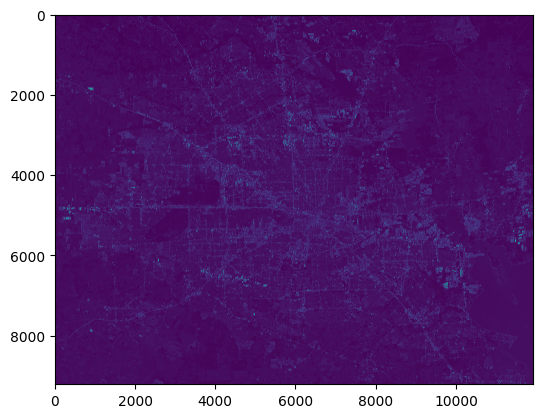

In [7]:
plt.imshow(img.read(1))

In [8]:
endm.head()

,value,geometry
0,0,POINT (-94.96698 30.21843)
1,0,POINT (-95.91292 30.22299)
2,0,POINT (-95.57554 30.2222)
3,0,POINT (-95.02315 30.21868)
4,0,POINT (-95.45102 30.22138)


In [9]:
endm = endm.rename({'value':'class'}, axis=1)

In [10]:
# endmembers
endm1 = extract(img, endm)
endm1 = endm1.loc[endm1['band1']!=0, ]
endm1.head()

,class,band1,band2,band3,band4,band5,band6,band7,band8,band9
12,0,244.812500,403.222229,295.750000,1932.000000,1326.857178,672.700012,0.734485,-0.654661,0.483472
14,0,223.687500,333.500000,235.888885,2248.333252,1076.000000,460.000000,0.810090,-0.741656,0.660308
15,1,246.500000,391.500000,310.500000,2165.250000,1737.500000,907.500000,0.749167,-0.693752,0.409324
16,1,1380.714233,1552.571411,1744.500000,2338.416748,3191.333252,2661.600098,0.145464,-0.201965,-0.064636
17,0,603.923096,901.120178,1045.500000,2504.111084,1999.857178,1418.166626,0.410921,-0.470744,0.276866


In [21]:
len(endm1.columns)

10

In [11]:
inst = MLA(image = img, endmembers = endm1)

In [12]:
rf_class = inst.RF(training_split = 0.8)

Results

In [13]:
rf_class.keys()

dict_keys(['Overall_Accuracy', 'Kappa_Index', 'Confusion_Matrix', 'Classification_Map', 'Image'])

In [14]:
rf_class.get('Overall_Accuracy')

0.6653061224489796

In [15]:
rf_class.get('Kappa_Index')

np.float64(0.3300430186414113)

In [16]:
matrix = rf_class.get('Confusion_Matrix')
matrix

,0,1,Total,Users_Accuracy,Commission
0,623.000000,323.000000,946.0,65.856237,34.143763
1,333.000000,681.000000,1014.0,67.159763,32.840237
Total,956.000000,1004.000000,NaN,NaN,NaN
Producer_Accuracy,65.167364,67.828685,NaN,NaN,NaN
Omission,34.832636,32.171315,NaN,NaN,NaN


In [18]:
palette = matplotlib.colors.ListedColormap(['dodgerblue','green'])

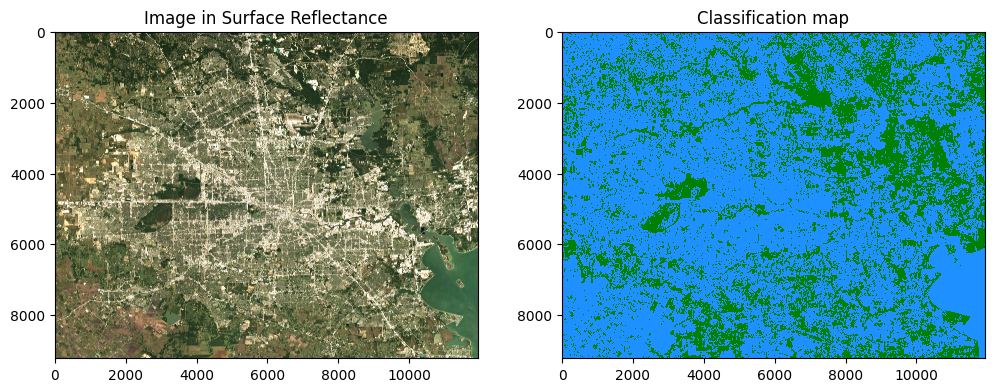

In [19]:
# Let´s plot
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 7))

# satellite image
plotRGB(img, bands = [3, 2, 1], title = 'Image in Surface Reflectance', ax = axes[0])

# class results
axes[1].imshow(rf_class.get('Classification_Map'), cmap = palette)
axes[1].set_title("Classification map")
axes[1].grid(False)

Deep learning model

In [20]:
instDL = DL(image = img, endmembers = endm1)

In [23]:
fc = instDL.FullyConnected(
    hidden_layers = 4,
    hidden_units = [64,16,8,8],
    output_units = 2,
    input_shape = (9,),
    epochs = 100,
    batch_size = 32,
    training_split = 0.8
)

C:\Users\wenxinyang\AppData\Local\miniforge3\envs\py310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3436416/3436416 ━━━━━━━━━━━━━━━━━━━━ 2096s 610us/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step


In [24]:
fc.keys()

dict_keys(['Overall_Accuracy', 'Kappa_Index', 'Confusion_Matrix', 'Classification_Map', 'Image'])

In [25]:
fc.get('Overall_Accuracy')

0.6326530612244898

In [26]:
fc.get('Kappa_Index')

np.float64(0.2656173404232067)

In [27]:
fc.get('Confusion_Matrix')

,0,1,Total,Users_Accuracy,Commission
0,417.000000,156.000000,573.0,72.774869,27.225131
1,564.000000,823.000000,1387.0,59.336698,40.663302
Total,981.000000,979.000000,NaN,NaN,NaN
Producer_Accuracy,42.507645,84.065373,NaN,NaN,NaN
Omission,57.492355,15.934627,NaN,NaN,NaN


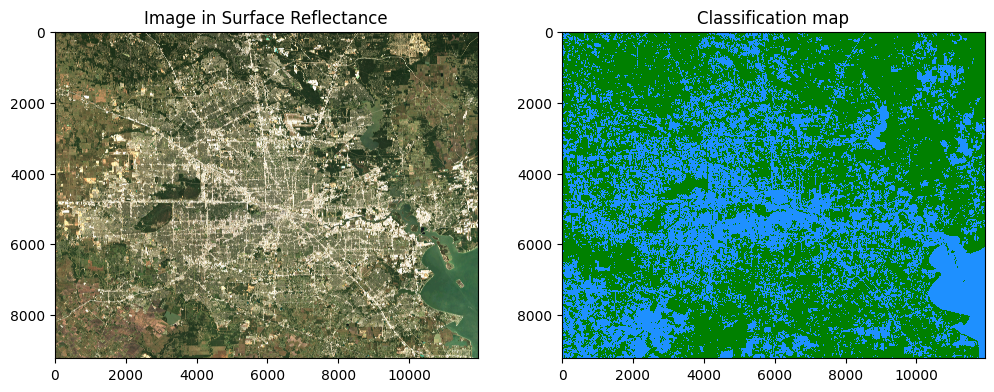

In [28]:
# Let´s plot
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 7))

# satellite image
plotRGB(img, bands = [3, 2, 1], title = 'Image in Surface Reflectance', ax = axes[0])

# class results
axes[1].imshow(fc.get('Classification_Map'), cmap = palette)
axes[1].set_title("Classification map")
axes[1].grid(False)